In [8]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
%matplotlib inline
import seaborn as sns

url = "pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
    
array = dataframe.values
X = array[:,0:8] # select all rows and first 7 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

In [7]:
dataframe.head(5)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


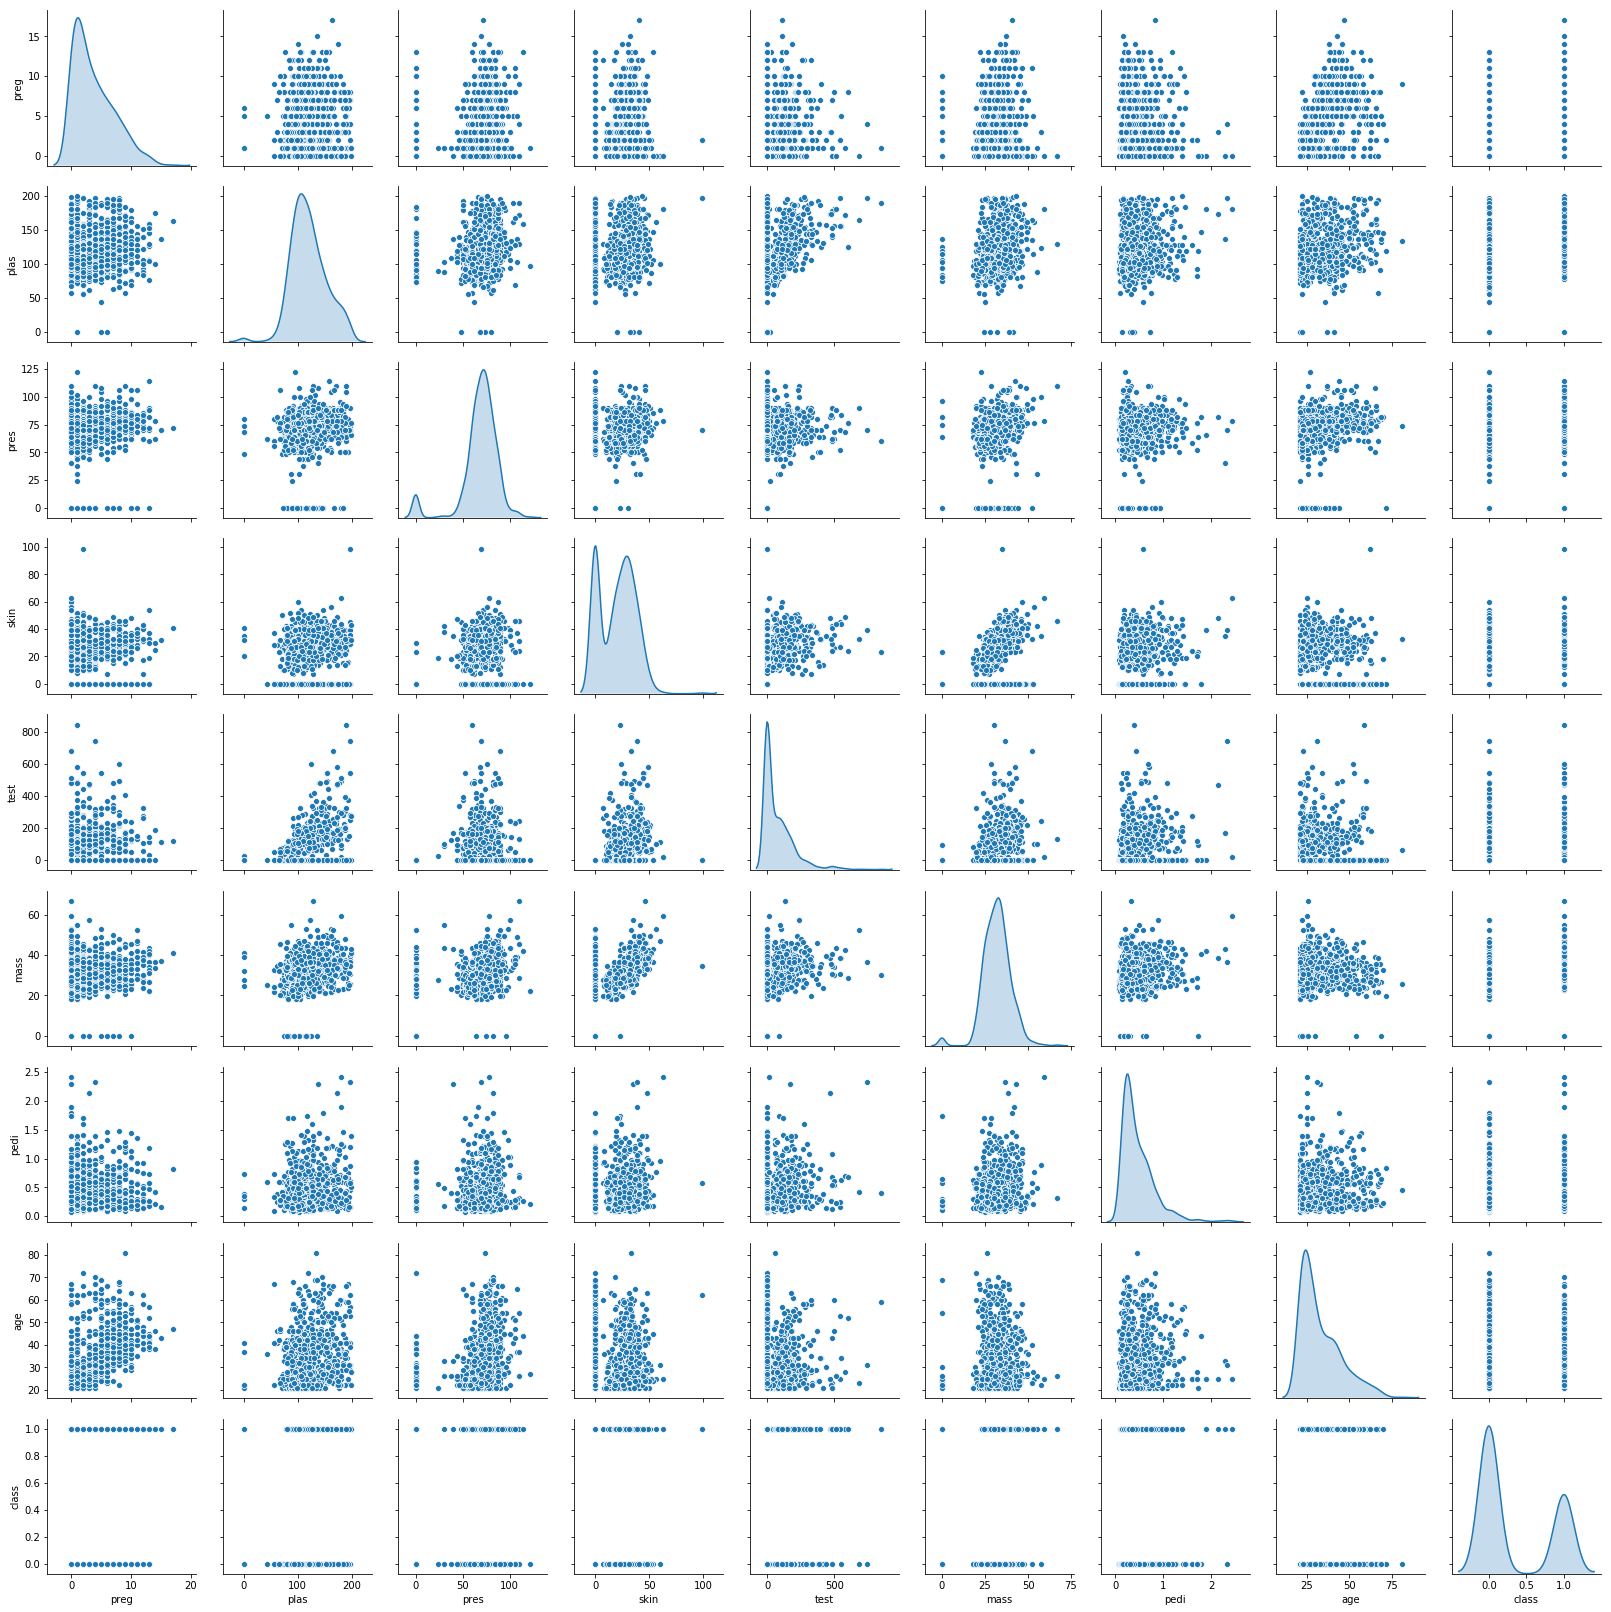

In [9]:
sns.pairplot(dataframe,diag_kind='kde')

In [10]:

model = GaussianNB()
model.fit(X_train, Y_train)
print(model)
# make predictions
expected = Y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.79       147
         1.0       0.64      0.65      0.65        84

   micro avg       0.74      0.74      0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231

[[116  31]
 [ 29  55]]


Precision: Within a given set of positively-labeled results, the fraction that were true positives = tp/(tp + fp)
Recall: Given a set of positively-labeled results, the fraction of all positives that were retrieved = tp/(tp + fn)
Accuracy: tp + tn / (tp + tn + fp +fn) But this measure can be dominated by larger class. Suppose 10, 90 and 80 of 90 is correctly predicted while only 2 of 0 is predicted correctly. Accuracy is 80+2 / 100 i.e. 82%

TO over come the dominance of the majority class, use weighted measure (not shown)

F is harmonic mean of precision and recal given by ((B^2 +1) PR) / (B^2P +R)
When B is set to 1 we get F1 = 2PR / (P+R)